# COS60008 Introduction to Data Science
## Assignment 2, 2024, Semester 1
## Student Details:
* Name: Harrison Stefanidis
* Student ID: 105260443
* Email: 105260443@student.swin.edu.au
* Submission Date: 11/05/2024
* TuteLab Class: Monday 12:30pm

## Task 1 - Problem Formulation, Data Acquisition and Preparation

### Sub-Task 1.1 - Load and Check Data


In [4]:
import pandas as pd

# Import Indian Liver Patient Dataset (ilpd_raw.csv) into df1
df1 = pd.read_csv('ilpd_raw.csv')

# Observe head of data
df1.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [5]:
# Observe relevant information on dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   65      582 non-null    int64  
 1   Female  582 non-null    object 
 2   0.7     582 non-null    float64
 3   0.1     582 non-null    float64
 4   187     582 non-null    int64  
 5   16      582 non-null    int64  
 6   18      582 non-null    int64  
 7   6.8     582 non-null    float64
 8   3.3     582 non-null    float64
 9   0.9     578 non-null    float64
 10  1       582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [6]:
# Check for number of columns and number of data entries
df1.shape

(582, 11)

### Sub-Task 1.2 - Cleaning and Filtering Data

In [8]:
# Read the CSV file without headers
df1 = pd.read_csv('ilpd_raw.csv', header=None)

# Manually insert the column titles as the first row
column_titles = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
                 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins', 
                 'Albumin', 'Albumin_and_Globulin_Ratio', 'Liver_Disease']
df1.loc[-1] = column_titles
df1.index = df1.index + 1
df1 = df1.sort_index()

# Rename the columns
df1.columns = df1.iloc[0]
df1 = df1.drop(0)

# Display the DataFrame again
df1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.0,1
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.4,1


### Sub-Task 1.3 - Finalising Dataset

In [10]:
# Check for missing values
missing_values = df1.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Check for duplicate rows
duplicate_rows = df1.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Check for unique values
unique_values = df1.apply(lambda column: list(column.unique()))
print(unique_values)

# Replace missing values in dataset with median value
median_value = df1['Albumin_and_Globulin_Ratio'].median()
df1['Albumin_and_Globulin_Ratio'] = df1['Albumin_and_Globulin_Ratio'].fillna(median_value)

# Remove duplicates and reset index
df1 = df1.drop_duplicates()
df1 = df1.reset_index(drop=True)

# Replace values 1 for presence of disease and 2 for absence of disease in liver disease
df1['Liver_Disease'] = df1['Liver_Disease'].replace({1: 'Present', 2: 'Absent'})

# Finalise and save dataset
df1.to_csv('ilpd_clean.csv', index=False)

Missing values per column:
0
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Disease                 0
dtype: int64
Number of duplicate rows: 13
0
Age                           [65, 62, 58, 72, 46, 26, 29, 17, 55, 57, 64, 7...
Gender                                                           [Female, Male]
Total_Bilirubin               [0.7, 10.9, 7.3, 1.0, 3.9, 1.8, 0.9, 0.6, 2.7,...
Direct_Bilirubin              [0.1, 5.5, 4.1, 0.4, 2.0, 0.7, 0.2, 0.3, 1.3, ...
Alkaline_Phosphotase          [187, 699, 490, 182, 195, 208, 154, 202, 290, ...
Alamine_Aminotransferase      [16, 64, 60, 14, 27, 19, 22, 53, 51, 31, 61, 9...
Aspartate_Aminotransferase    [18, 100, 68, 20, 59, 14, 12, 11, 19, 58, 56, ...
Total_Proteins 

## Task 2 - Data Exploration

### Sub-Task 2.1 - Exploring Each Column

In [13]:
# Import cleaned dataset into df2
df2 = pd.read_csv('ilpd_clean.csv')

# Descriptive statistics for numeric columns
num_summary = df2.describe()
print("Summary statistics for numeric columns:")
print(num_summary)

# Frequency counts for categorical columns
gender_counts = df2['Gender'].value_counts()
liver_disease_counts = df2['Liver_Disease'].value_counts()
print("Frequency counts for categorical columns:")
print(gender_counts)
print(liver_disease_counts)

Summary statistics for numeric columns:
              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  570.000000       570.000000        570.000000            570.000000   
mean    44.849123         3.321754          1.497544            291.750877   
std     16.242182         6.267941          2.833231            245.291859   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            176.000000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
count                570.000000                  570.000000      570.000000   
mean                  79.728070                  109.380702        6.496316   
std                 

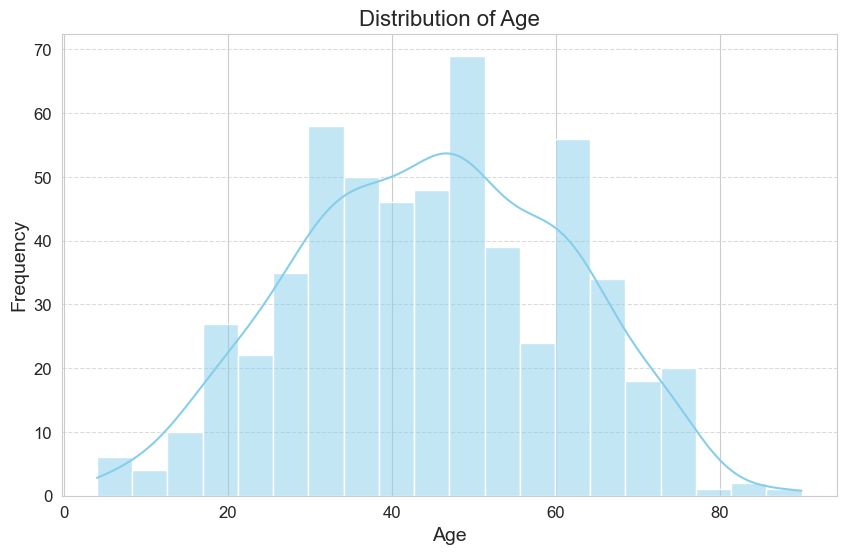

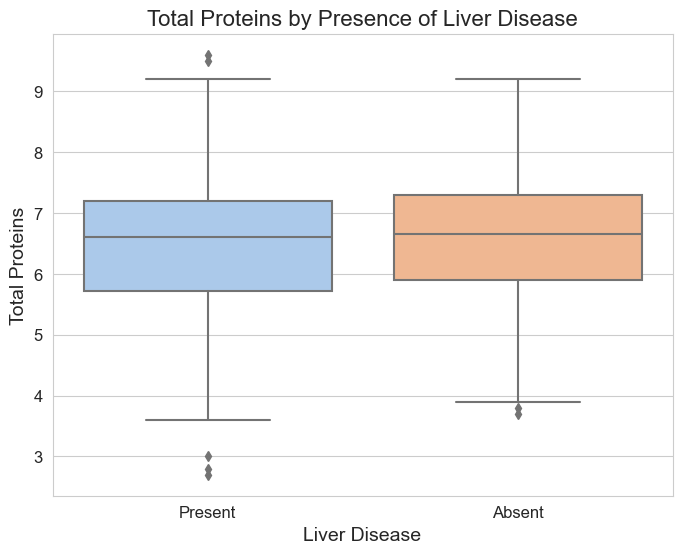

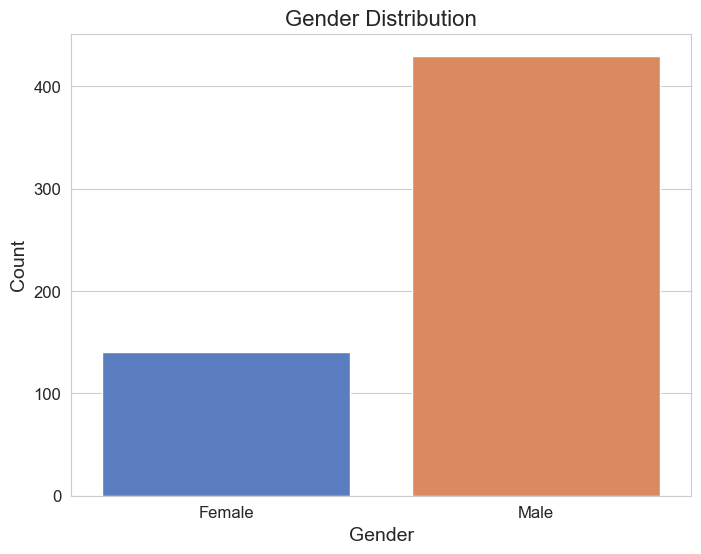

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Histogram for age column
plt.figure(figsize=(10, 6))
sns.histplot(df2['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Box plot for total protein column
plt.figure(figsize=(8, 6))
sns.boxplot(x='Liver_Disease', y='Total_Proteins', data=df2, palette='pastel')
plt.title('Total Proteins by Presence of Liver Disease', fontsize=16)
plt.xlabel('Liver Disease', fontsize=14)
plt.ylabel('Total Proteins', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Bar plot for gender column
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df2, palette='muted')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Sub-Task 2.2 - Exploring Relationships Between Pairs of Columns

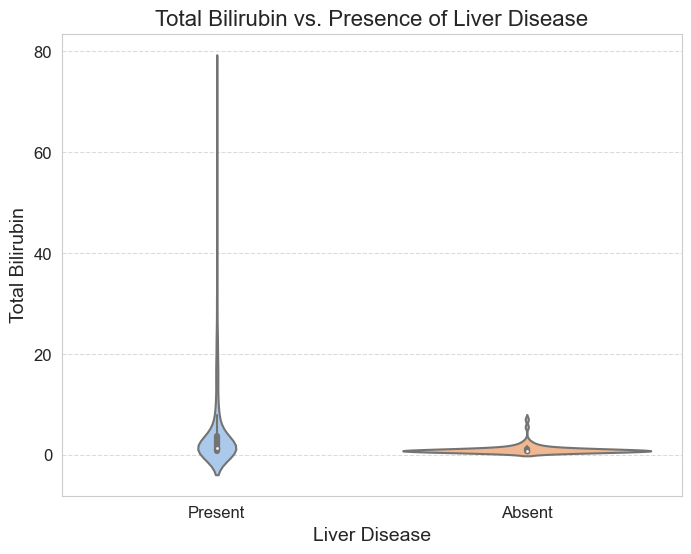

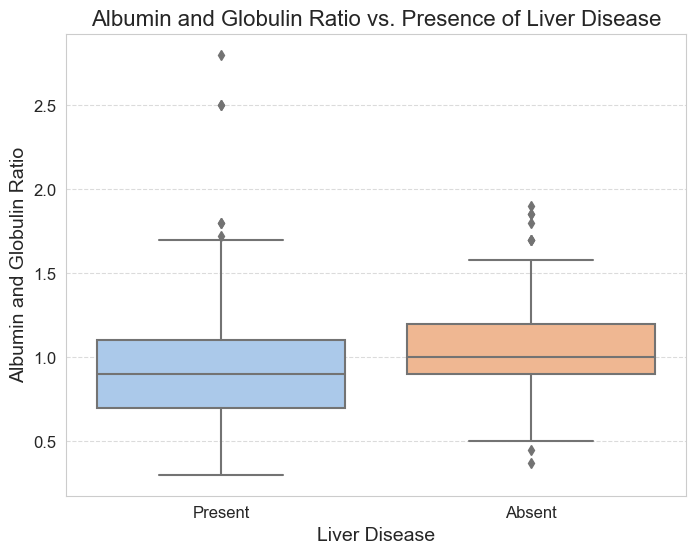

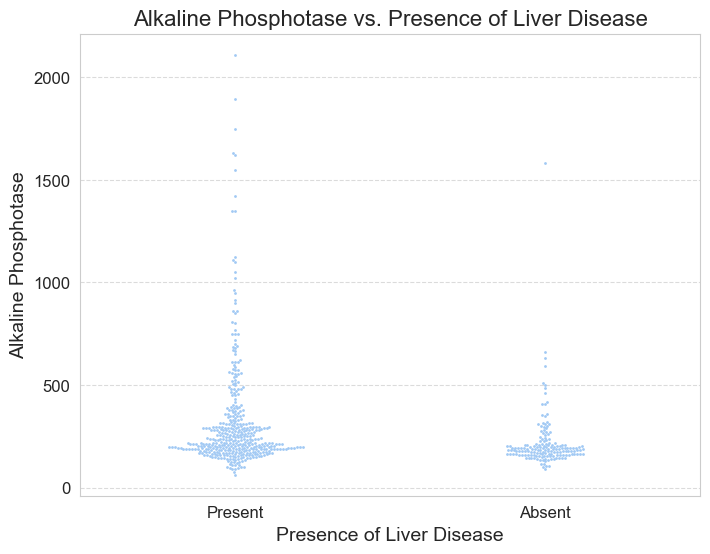

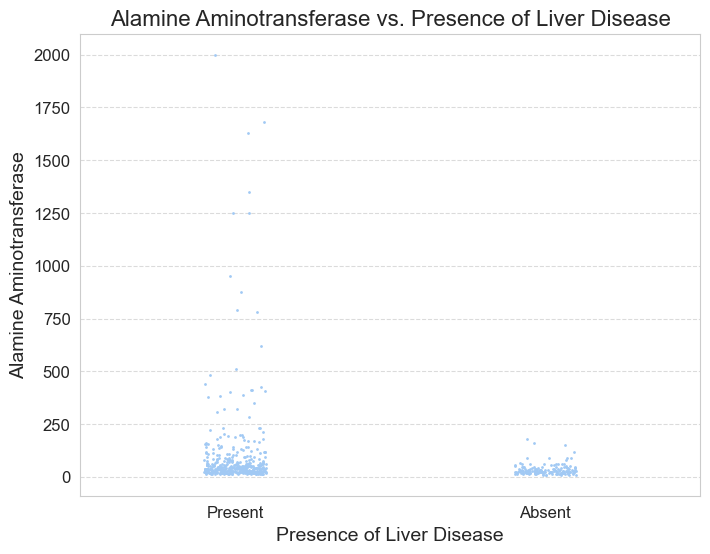

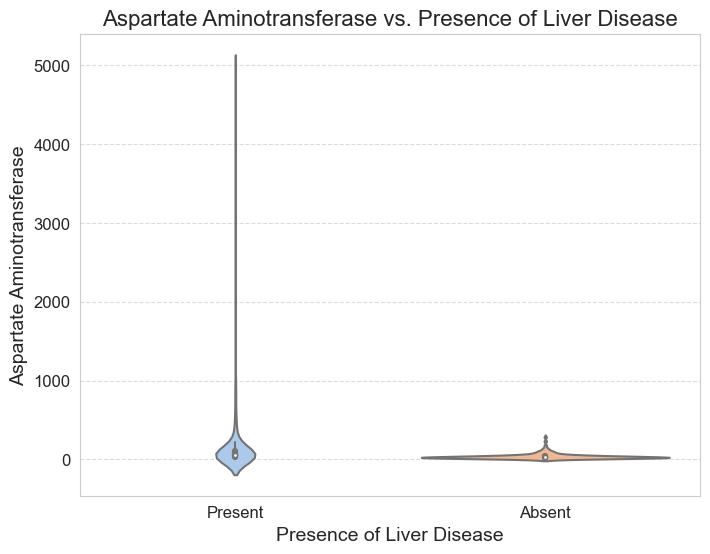

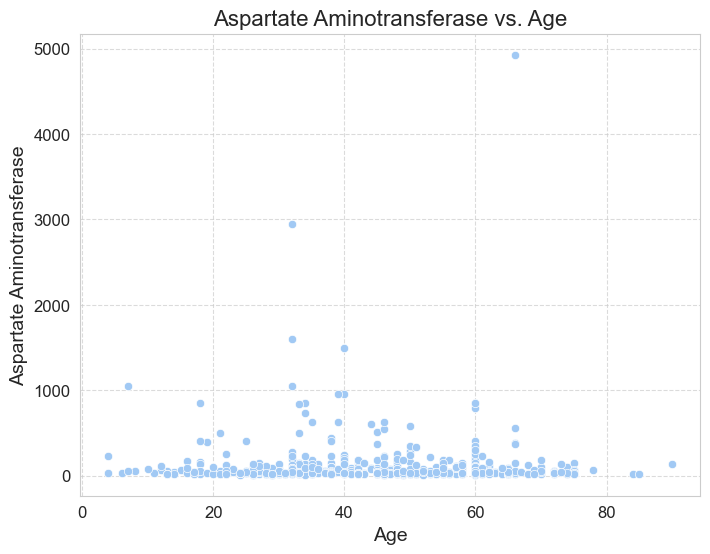

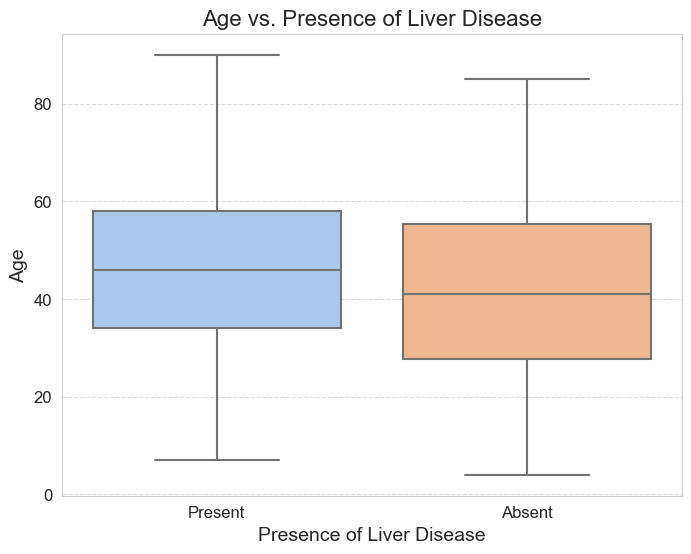

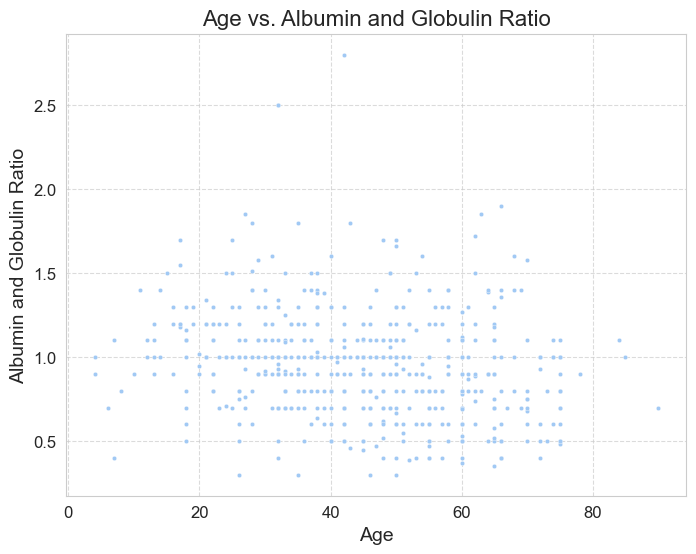

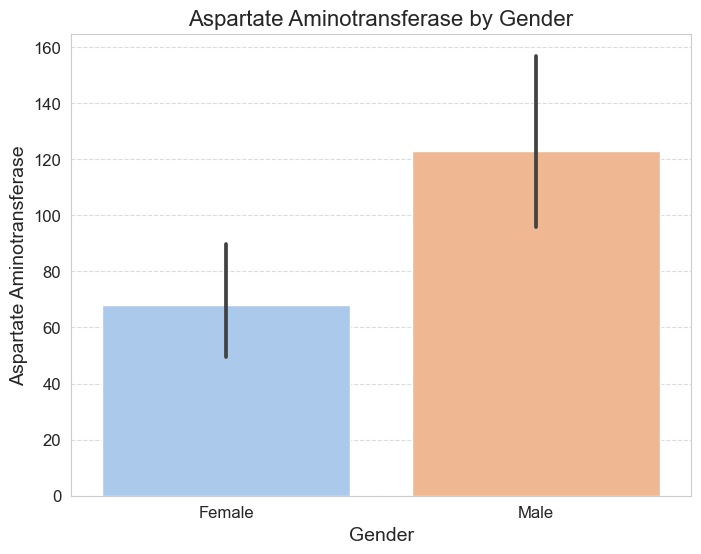

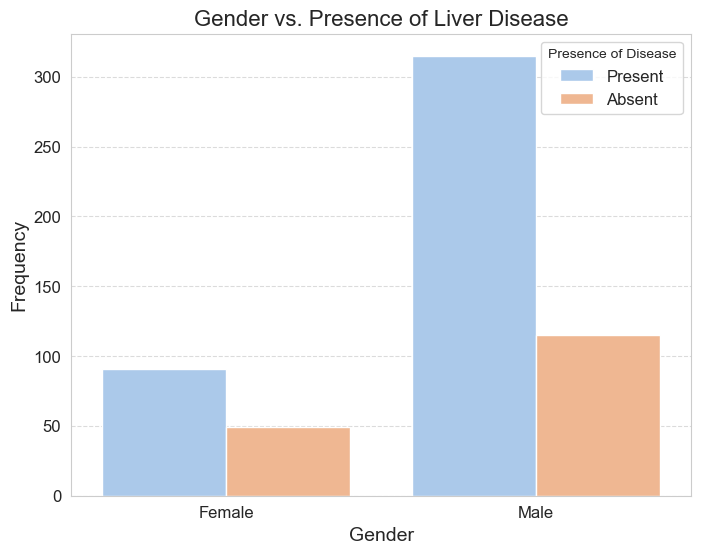

In [16]:
# Violin plot comparison between total bilirubin vs presence of liver disease
sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(8, 6))
sns.violinplot(x='Liver_Disease', y='Total_Bilirubin', data=df2)
plt.title('Total Bilirubin vs. Presence of Liver Disease', fontsize=16)
plt.xlabel('Liver Disease', fontsize=14)
plt.ylabel('Total Bilirubin', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Box plot comparing albumin and globulin ratio to liver disease presence
plt.figure(figsize=(8, 6))
sns.boxplot(x='Liver_Disease', y='Albumin_and_Globulin_Ratio', data=df2)
plt.title('Albumin and Globulin Ratio vs. Presence of Liver Disease', fontsize=16)
plt.xlabel('Liver Disease', fontsize=14)
plt.ylabel('Albumin and Globulin Ratio', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comparison between presence of liver disease and alkaline phosphotase using a swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Liver_Disease', y='Alkaline_Phosphotase', data=df2, size=2)
plt.title('Alkaline Phosphotase vs. Presence of Liver Disease', fontsize=16)
plt.xlabel('Presence of Liver Disease', fontsize=14)
plt.ylabel('Alkaline Phosphotase', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comparing liver disease presence with alamine aminotransferase
plt.figure(figsize=(8, 6))
sns.stripplot(x='Liver_Disease', y='Alamine_Aminotransferase', data=df2, jitter=True, size=2)
plt.title('Alamine Aminotransferase vs. Presence of Liver Disease', fontsize=16)
plt.xlabel('Presence of Liver Disease', fontsize=14)
plt.ylabel('Alamine Aminotransferase', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comparison between presence of liver disease and aspartate aminotransferase
plt.figure(figsize=(8, 6))
sns.violinplot(x='Liver_Disease', y='Aspartate_Aminotransferase', data=df2)
plt.title('Aspartate Aminotransferase vs. Presence of Liver Disease', fontsize=16)
plt.xlabel('Presence of Liver Disease', fontsize=14)
plt.ylabel('Aspartate Aminotransferase', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Age against aspartate aminotransferase using scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Aspartate_Aminotransferase', data=df2)
plt.title('Aspartate Aminotransferase vs. Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Aspartate Aminotransferase', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Visualisation of age vs presence of liver disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='Liver_Disease', y='Age', data=df2)
plt.title('Age vs. Presence of Liver Disease', fontsize=16)
plt.xlabel('Presence of Liver Disease', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comparing age with albumin and globulin ratio.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Albumin_and_Globulin_Ratio', data=df2, s=10)
plt.title('Age vs. Albumin and Globulin Ratio', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Albumin and Globulin Ratio', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Gender comparison to frequency presence of aspartate aminotransferase
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Aspartate_Aminotransferase', data=df2)
plt.title('Aspartate Aminotransferase by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Aspartate Aminotransferase', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gender vs presence of liver disease
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Liver_Disease', data=df2)
plt.title('Gender vs. Presence of Liver Disease', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Presence of Disease', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Sub-Task 2.3 - Meaningful Exploration of Data

C:\Users\harri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\harri\AppData\Local\Temp\ipykernel_23700\3459786553.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


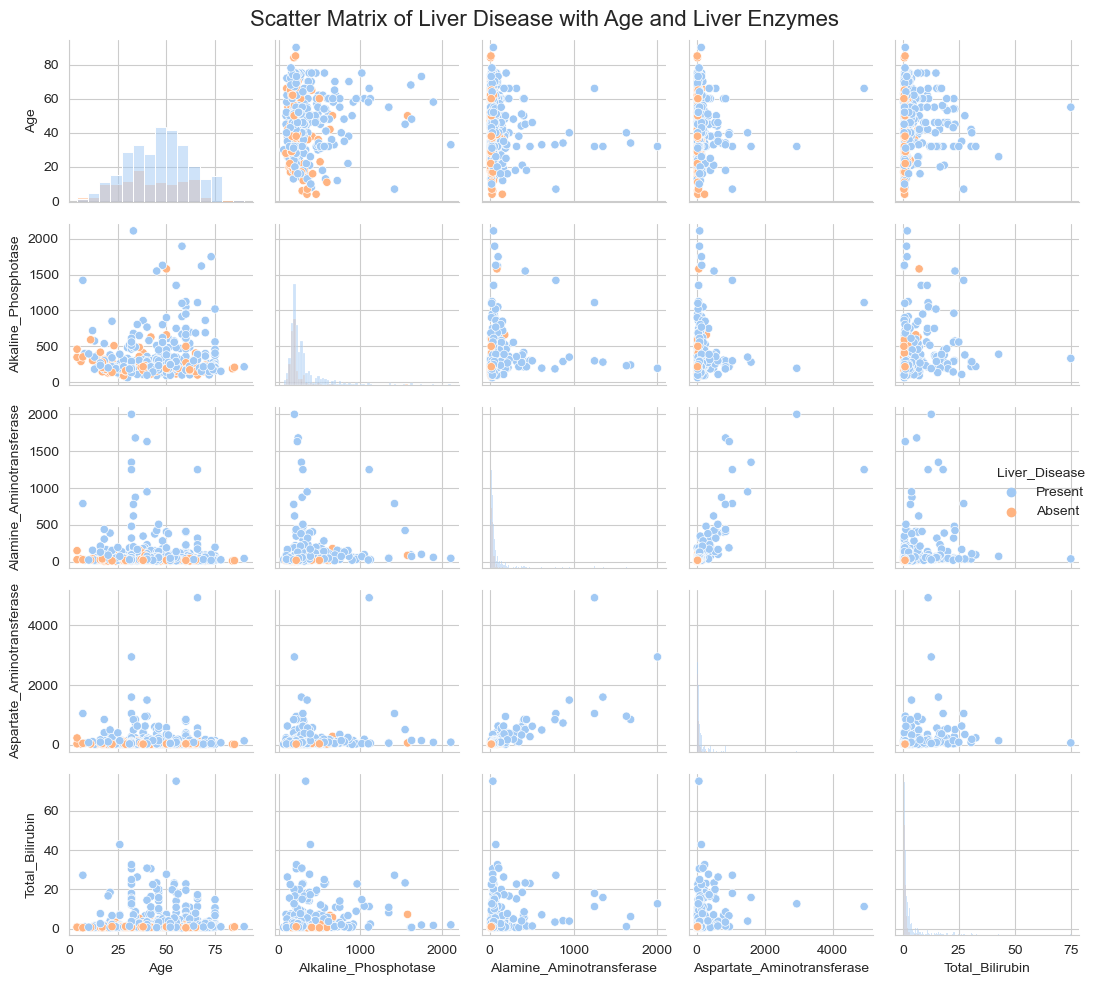

Descriptive Statistics for Numerical Columns:
              Age  Alkaline_Phosphotase  Alamine_Aminotransferase  \
count  570.000000            570.000000                570.000000   
mean    44.849123            291.750877                 79.728070   
std     16.242182            245.291859                181.471697   
min      4.000000             63.000000                 10.000000   
25%     33.000000            176.000000                 23.000000   
50%     45.000000            208.000000                 35.000000   
75%     58.000000            298.000000                 60.000000   
max     90.000000           2110.000000               2000.000000   

       Aspartate_Aminotransferase  Total_Bilirubin  
count                  570.000000       570.000000  
mean                   109.380702         3.321754  
std                    290.880671         6.267941  
min                     10.000000         0.400000  
25%                     25.000000         0.800000  
50%           

In [18]:
# What factors primarily contribute to the presence of liver disease?

# Selecting columns for the scatter matrix
selected_columns = ['Age', 'Gender', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 
                    'Aspartate_Aminotransferase', 'Liver_Disease', 'Total_Bilirubin']

# Creation of scatter matrix
sns.pairplot(df2[selected_columns], hue='Liver_Disease', diag_kind='hist', palette='pastel', height=2)
plt.suptitle('Scatter Matrix of Liver Disease with Age and Liver Enzymes', fontsize=16)
plt.tight_layout()
plt.show()

# Exploration of descriptive statistics for same data labels

# Descriptive statistics for numerical columns
numerical_columns = ['Age', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Bilirubin']
numerical_stats = df2[numerical_columns].describe()

# Descriptive statistics for categorical column (Gender and Presence of Disease)
categorical_stats_gender = df2['Gender'].value_counts()
categorical_stats_liver_disease = df2['Liver_Disease'].value_counts()

print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)

print("Descriptive Statistics for Categorical Column (Gender):")
print(categorical_stats_gender)

print("\nDescriptive Statistics for Categorical Column (Liver Disease):")
print(categorical_stats_liver_disease)

## Task 3 - Data Modelling

### Sub-Task 3.1 - Training and Test Sets

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Classification Model 1 - Random Forest
# Classification Model 2 - Neural Network

# Define features and target variables
X = df2.drop(columns=['Liver_Disease'])  # General features excluding target variable
y = df2['Liver_Disease']  # Target variable

# Encode categorical features
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

# Split data into training and testing sets (50% training, 50% testing)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.5, random_state=42)

# Print the shapes of the training and testing sets
print("Suite 1: Training set shape:", X_train_1.shape, 
      "Testing set shape:", X_test_1.shape)

# Split data into training and testing sets (60% training, 40% testing)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.4, train_size=0.6, random_state=42)

# Print the shapes of the training and testing sets
print("Suite 2: Training set shape:", X_train_2.shape, 
      "Testing set shape:", X_test_2.shape)

# Split data into training and testing sets (80% training, 20% testing)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# Print the shapes of the training and testing sets
print("Suite 3: Training set shape:", X_train_3.shape, 
      "Testing set shape:", X_test_3.shape)

Suite 1: Training set shape: (285, 10) Testing set shape: (285, 10)
Suite 2: Training set shape: (342, 10) Testing set shape: (228, 10)
Suite 3: Training set shape: (456, 10) Testing set shape: (114, 10)


### Sub-Task 3.2 - Performance Evaluation of Data Sets

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Create list of training and testing variables for subsequent evaluation
for i, (X_train, X_test, y_train, y_test) in enumerate([(X_train_1, X_test_1, y_train_1, y_test_1),
                                                         (X_train_2, X_test_2, y_train_2, y_test_2),
                                                         (X_train_3, X_test_3, y_train_3, y_test_3)]):
    print(f"Suite {i+1}:")
    
    # Train and evaluate Random Forest classifier
    rf_classifier.fit(X_train, y_train)
    rf_accuracy = rf_classifier.score(X_test, y_test)
    print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
    
    # Train and evaluate Neural Network classifier
    nn_classifier.fit(X_train, y_train)
    nn_accuracy = nn_classifier.score(X_test, y_test)
    print(f"Neural Network Accuracy: {nn_accuracy:.2f}")
    
    print()

Suite 1:
Random Forest Accuracy: 0.70
Neural Network Accuracy: 0.72

Suite 2:
Random Forest Accuracy: 0.72
Neural Network Accuracy: 0.75

Suite 3:
Random Forest Accuracy: 0.74
Neural Network Accuracy: 0.74



In [24]:
# Confusion matrix performance evaluation
from sklearn.metrics import confusion_matrix

# Define a function to calculate confusion matrix
def calculate_confusion_matrix(model, X_test, y_test):
    
    # Predictions on testing set
    y_pred = model.predict(X_test)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return cm

# Calculate confusion matrix for Random Forest classifier
rf_cm_1 = calculate_confusion_matrix(rf_classifier, X_test_1, y_test_1)
rf_cm_2 = calculate_confusion_matrix(rf_classifier, X_test_2, y_test_2)
rf_cm_3 = calculate_confusion_matrix(rf_classifier, X_test_3, y_test_3)

# Calculate confusion matrix for Neural Network classifier
nn_cm_1 = calculate_confusion_matrix(nn_classifier, X_test_1, y_test_1)
nn_cm_2 = calculate_confusion_matrix(nn_classifier, X_test_2, y_test_2)
nn_cm_3 = calculate_confusion_matrix(nn_classifier, X_test_3, y_test_3)

# Print confusion matrices
print("Random Forest Confusion Matrices:")
print("Suite 1:")
print(rf_cm_1)
print("Suite 2:")
print(rf_cm_2)
print("Suite 3:")
print(rf_cm_3)

print("\nNeural Network Confusion Matrices:")
print("Suite 1:")
print(nn_cm_1)
print("Suite 2:")
print(nn_cm_2)
print("Suite 3:")
print(nn_cm_3)

Random Forest Confusion Matrices:
Suite 1:
[[ 64  18]
 [ 12 191]]
Suite 2:
[[ 49  18]
 [ 12 149]]
Suite 3:
[[11 18]
 [12 73]]

Neural Network Confusion Matrices:
Suite 1:
[[ 19  63]
 [  7 196]]
Suite 2:
[[ 14  53]
 [  6 155]]
Suite 3:
[[ 3 26]
 [ 4 81]]


In [25]:
# Precision score performance evaluation
from sklearn.metrics import precision_score

# Define a function to calculate precision
def calculate_precision(model, X_test, y_test):
    
    # Predictions on testing set
    y_pred = model.predict(X_test)
    
    # Precision
    precision = precision_score(y_test, y_pred, pos_label='Present')
    
    return precision

# Calculate precision for Random Forest classifier
rf_precision_1 = calculate_precision(rf_classifier, X_test_1, y_test_1)
rf_precision_2 = calculate_precision(rf_classifier, X_test_2, y_test_2)
rf_precision_3 = calculate_precision(rf_classifier, X_test_3, y_test_3)

# Calculate precision for Neural Network classifier
nn_precision_1 = calculate_precision(nn_classifier, X_test_1, y_test_1)
nn_precision_2 = calculate_precision(nn_classifier, X_test_2, y_test_2)
nn_precision_3 = calculate_precision(nn_classifier, X_test_3, y_test_3)

# Print precision scores
print("Random Forest Precision Scores:")
print("Suite 1:", rf_precision_1)
print("Suite 2:", rf_precision_2)
print("Suite 3:", rf_precision_3)

print("\nNeural Network Precision Scores:")
print("Suite 1:", nn_precision_1)
print("Suite 2:", nn_precision_2)
print("Suite 3:", nn_precision_3)

Random Forest Precision Scores:
Suite 1: 0.9138755980861244
Suite 2: 0.8922155688622755
Suite 3: 0.8021978021978022

Neural Network Precision Scores:
Suite 1: 0.7567567567567568
Suite 2: 0.7451923076923077
Suite 3: 0.7570093457943925


In [26]:
# Recall score performance evaluation
from sklearn.metrics import recall_score

# Define a function to calculate recall
def calculate_recall(model, X_test, y_test):
    
    # Predictions on testing set
    y_pred = model.predict(X_test)
    
    # Recall
    recall = recall_score(y_test, y_pred, pos_label='Present')
    
    return recall

# Calculate recall for Random Forest classifier
rf_recall_1 = calculate_recall(rf_classifier, X_test_1, y_test_1)
rf_recall_2 = calculate_recall(rf_classifier, X_test_2, y_test_2)
rf_recall_3 = calculate_recall(rf_classifier, X_test_3, y_test_3)

# Calculate recall for Neural Network classifier
nn_recall_1 = calculate_recall(nn_classifier, X_test_1, y_test_1)
nn_recall_2 = calculate_recall(nn_classifier, X_test_2, y_test_2)
nn_recall_3 = calculate_recall(nn_classifier, X_test_3, y_test_3)

# Print recall scores
print("Random Forest Recall Scores:")
print("Suite 1:", rf_recall_1)
print("Suite 2:", rf_recall_2)
print("Suite 3:", rf_recall_3)

print("\nNeural Network Recall Scores:")
print("Suite 1:", nn_recall_1)
print("Suite 2:", nn_recall_2)
print("Suite 3:", nn_recall_3)

Random Forest Recall Scores:
Suite 1: 0.9408866995073891
Suite 2: 0.9254658385093167
Suite 3: 0.8588235294117647

Neural Network Recall Scores:
Suite 1: 0.9655172413793104
Suite 2: 0.9627329192546584
Suite 3: 0.9529411764705882


In [27]:
# F1 score performance evaluation
from sklearn.metrics import f1_score

# Define a function to calculate F1 score
def calculate_f1_score(model, X_test, y_test):
    
    # Predictions on testing set
    y_pred = model.predict(X_test)
    
    # F1 score
    f1 = f1_score(y_test, y_pred, pos_label='Present')
    
    return f1

# Calculate F1 score for Random Forest classifier
rf_f1_1 = calculate_f1_score(rf_classifier, X_test_1, y_test_1)
rf_f1_2 = calculate_f1_score(rf_classifier, X_test_2, y_test_2)
rf_f1_3 = calculate_f1_score(rf_classifier, X_test_3, y_test_3)

# Calculate F1 score for Neural Network classifier
nn_f1_1 = calculate_f1_score(nn_classifier, X_test_1, y_test_1)
nn_f1_2 = calculate_f1_score(nn_classifier, X_test_2, y_test_2)
nn_f1_3 = calculate_f1_score(nn_classifier, X_test_3, y_test_3)

# Print F1 scores
print("Random Forest F1 Scores:")
print("Suite 1:", rf_f1_1)
print("Suite 2:", rf_f1_2)
print("Suite 3:", rf_f1_3)

print("\nNeural Network F1 Scores:")
print("Suite 1:", nn_f1_1)
print("Suite 2:", nn_f1_2)
print("Suite 3:", nn_f1_3)

Random Forest F1 Scores:
Suite 1: 0.9271844660194175
Suite 2: 0.9085365853658537
Suite 3: 0.8295454545454546

Neural Network F1 Scores:
Suite 1: 0.8484848484848485
Suite 2: 0.8401084010840109
Suite 3: 0.84375


### Sub-Task 3.3 - Comparing Chosen Models

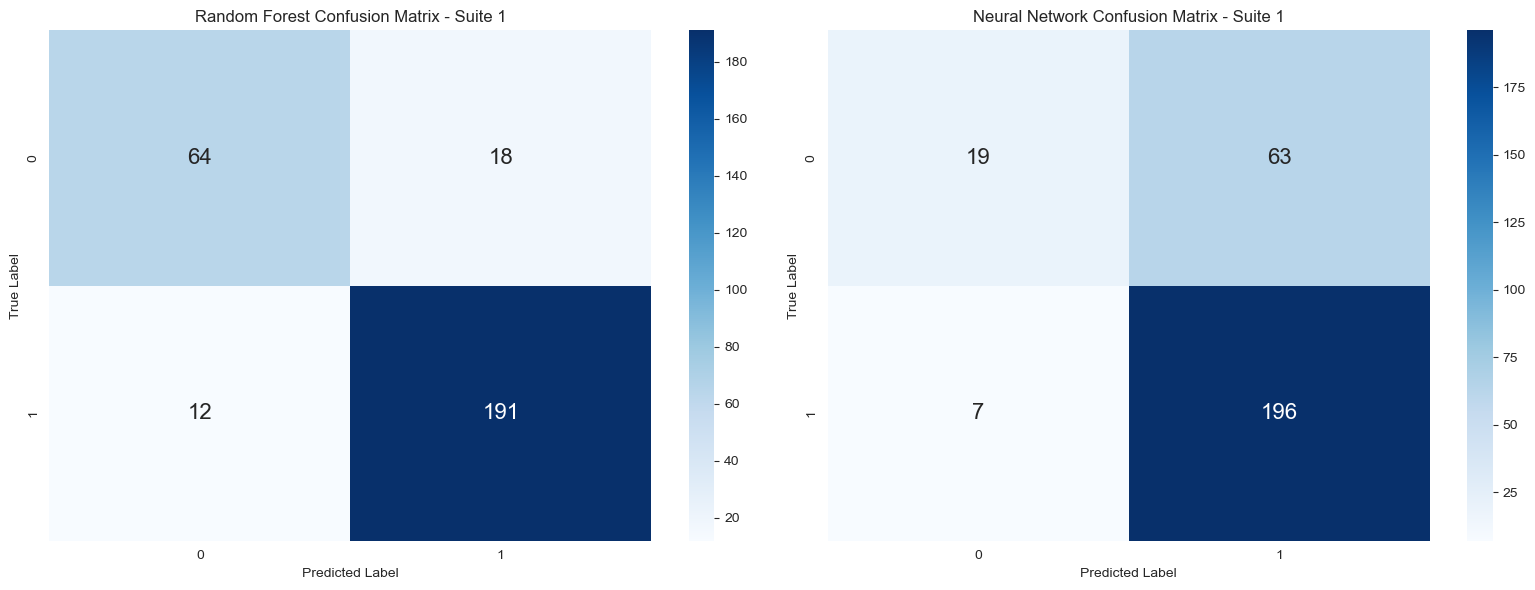

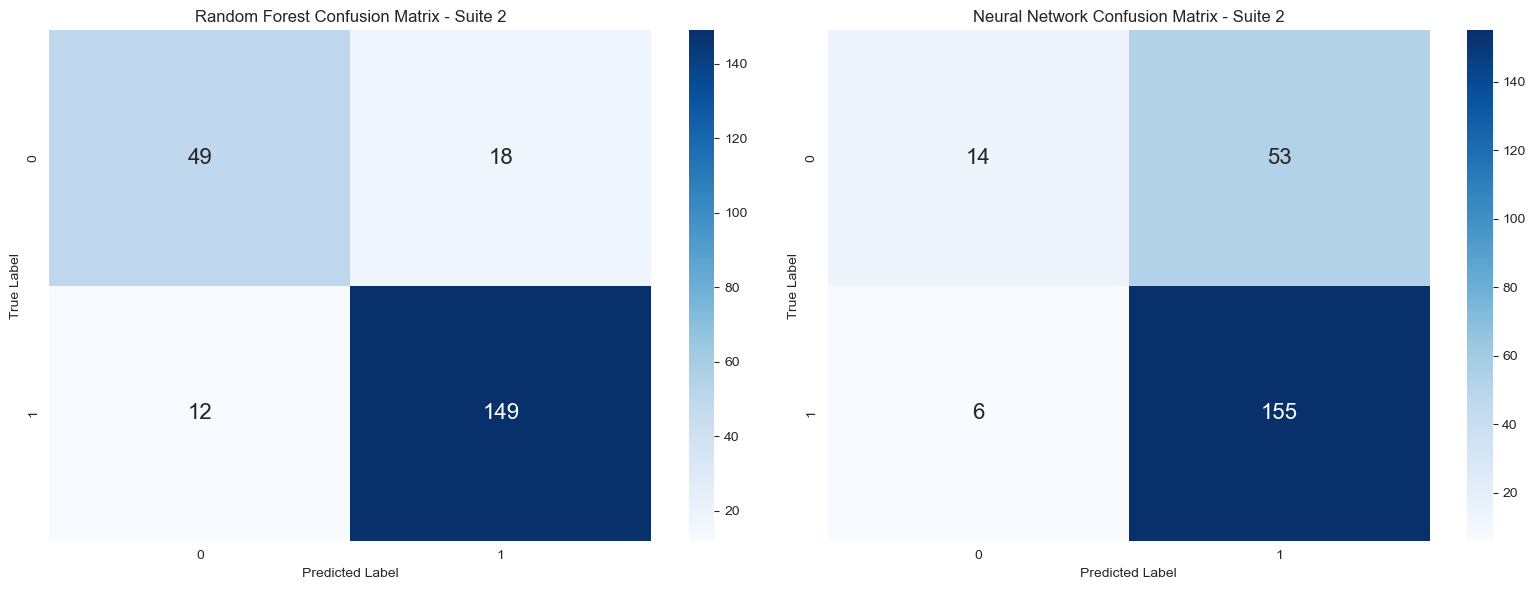

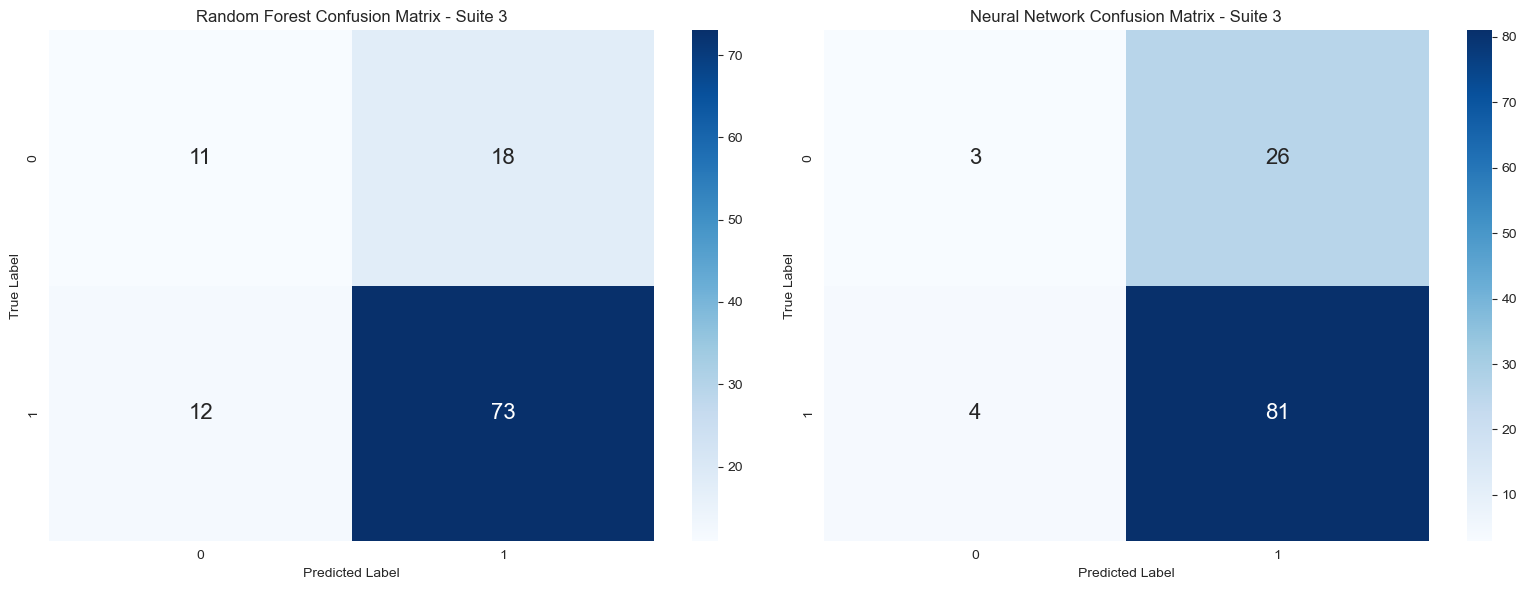

In [29]:
# Define a function to plot a confusion matrix for both random forest and neural network
def plot_confusion_matrix(model_rf, model_nn, X_test, y_test, title_rf, title_nn):
    
    # Predictions on testing set
    y_pred_rf = model_rf.predict(X_test)
    y_pred_nn = model_nn.predict(X_test)
    
    # Calculate confusion matrix
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    cm_nn = confusion_matrix(y_test, y_pred_nn)
    
    # Plot confusion matrix for Random Forest classifier
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title(title_rf)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Plot confusion matrix for Neural Network classifier
    plt.subplot(1, 2, 2)
    sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title(title_nn)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

# Plot confusion matrix for both Random Forest and Neural Network classifiers
plot_confusion_matrix(rf_classifier, nn_classifier, X_test_1, y_test_1,
                      title_rf='Random Forest Confusion Matrix - Suite 1',
                      title_nn='Neural Network Confusion Matrix - Suite 1')

plot_confusion_matrix(rf_classifier, nn_classifier, X_test_2, y_test_2,
                      title_rf='Random Forest Confusion Matrix - Suite 2',
                      title_nn='Neural Network Confusion Matrix - Suite 2')

plot_confusion_matrix(rf_classifier, nn_classifier, X_test_3, y_test_3,
                      title_rf='Random Forest Confusion Matrix - Suite 3',
                      title_nn='Neural Network Confusion Matrix - Suite 3')

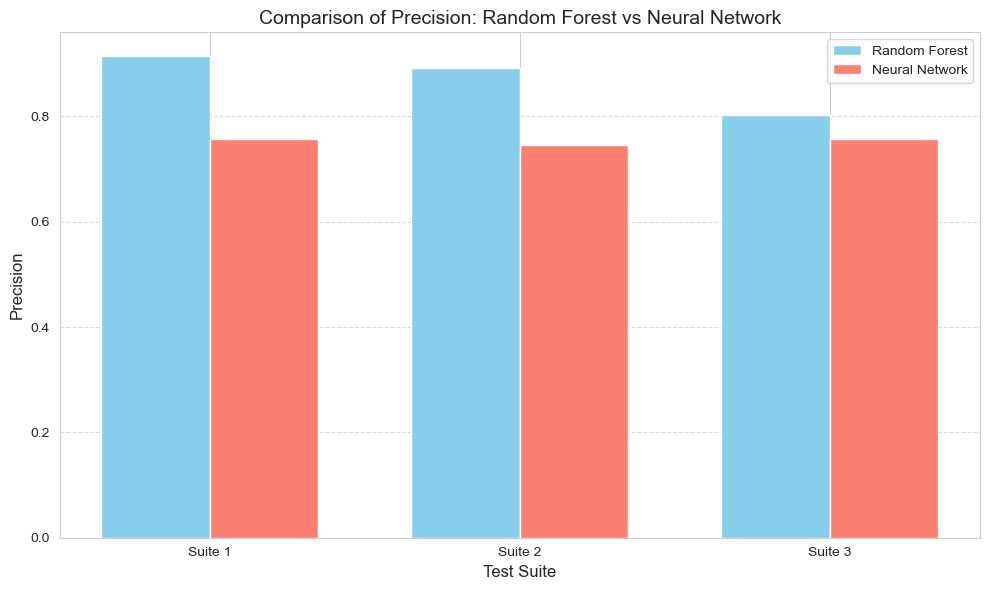

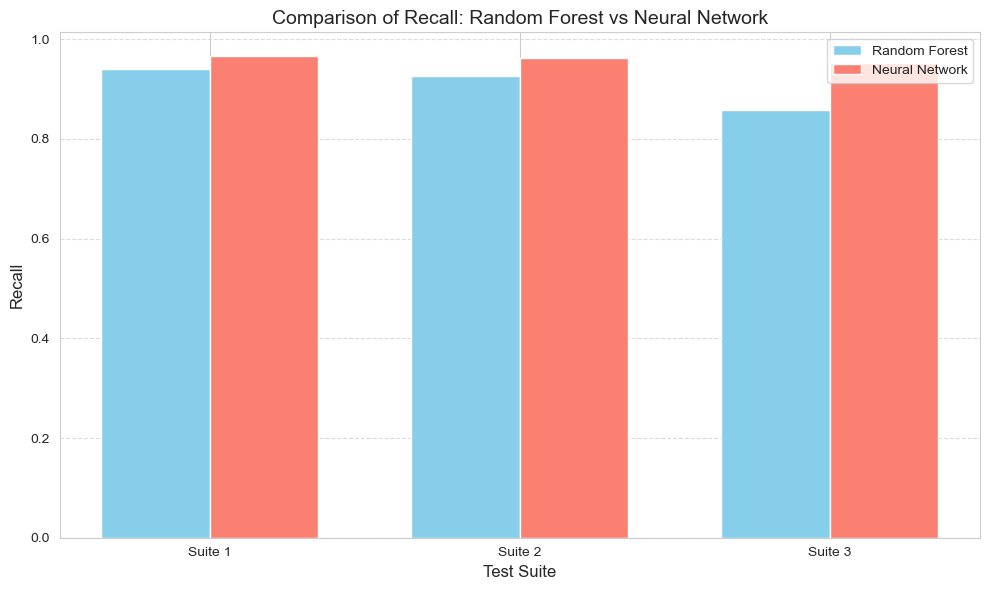

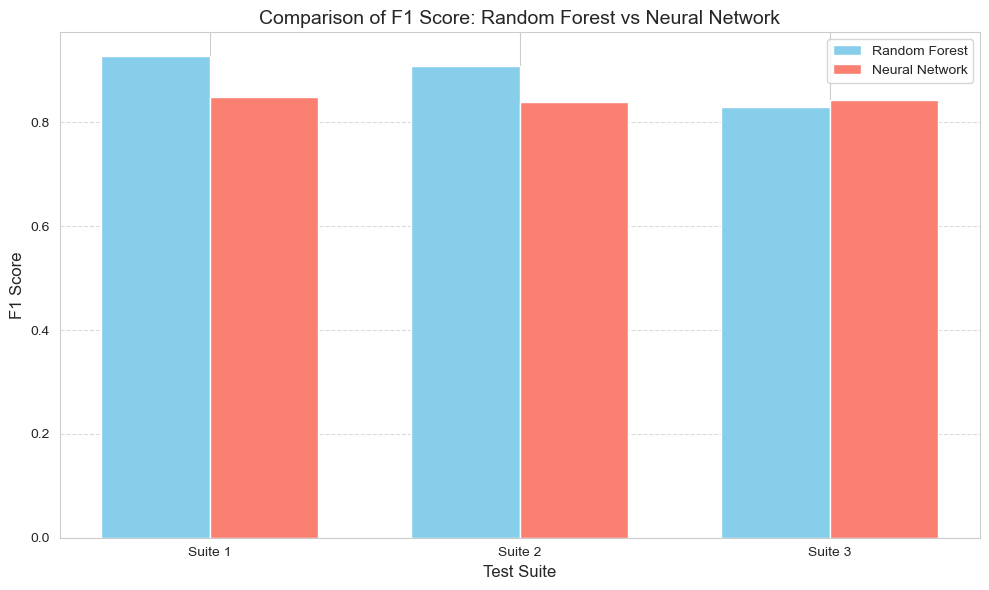

In [30]:
import numpy as np

# Define a function to plot the other scores for both random forest and neural network
def plot_evaluation_metrics(metric_values_rf, metric_values_nn, suites, metric_name):
    
    plt.figure(figsize=(10, 6))
    
    bar_width = 0.35
    index = np.arange(len(suites))
    
    plt.bar(index, metric_values_rf, color='skyblue', width=bar_width, label='Random Forest')
    plt.bar(index + bar_width, metric_values_nn, color='salmon', width=bar_width, label='Neural Network')
    
    plt.xlabel('Test Suite', fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    plt.title(f'Comparison of {metric_name}: Random Forest vs Neural Network', fontsize=14)
    
    plt.xticks(index + bar_width / 2, suites, fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Precision scores
precision_rf = [rf_precision_1, rf_precision_2, rf_precision_3]
precision_nn = [nn_precision_1, nn_precision_2, nn_precision_3]
plot_evaluation_metrics(precision_rf, precision_nn, suites=['Suite 1', 'Suite 2', 'Suite 3'], metric_name='Precision')

# Recall scores
recall_rf = [rf_recall_1, rf_recall_2, rf_recall_3]
recall_nn = [nn_recall_1, nn_recall_2, nn_recall_3]
plot_evaluation_metrics(recall_rf, recall_nn, suites=['Suite 1', 'Suite 2', 'Suite 3'], metric_name='Recall')

# F1 scores
f1_score_rf = [rf_f1_1, rf_f1_2, rf_f1_3]
f1_score_nn = [nn_f1_1, nn_f1_2, nn_f1_3]
plot_evaluation_metrics(f1_score_rf, f1_score_nn, suites=['Suite 1', 'Suite 2', 'Suite 3'], metric_name='F1 Score')